In [9]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 17.3 s


In [19]:
len(features)

52

In [10]:
dSlow.head()

,SpecId,Label,ScanNr,ExpMass,CalcMass,mass,peplen,charge2,charge3,charge4,...,NuXL:XL_U,NuXL:XL_C,NuXL:XL_G,NuXL:XL_A,Peptide,Proteins,FDR,q-val,class-specific_q-val,Rank
15534,controllerType=0controllerNumber=1scan=8704,1,8704,0.628104,0.628105,0.628104,0.772727,0,1,0,...,0,0,0,0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK.S,sp|P35527|K1C9_HUMAN,0.0,0.0,0.0,1
15647,controllerType=0controllerNumber=1scan=8757,1,8757,0.628107,0.628105,0.628107,0.772727,0,1,0,...,0,0,0,0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK.S,sp|P35527|K1C9_HUMAN,0.0,0.0,0.0,1
12279,controllerType=0controllerNumber=1scan=7273,1,7273,0.479916,0.479915,0.479916,0.863636,0,0,1,...,0,0,0,0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGKSSHS.-,sp|P35527|K1C9_HUMAN,0.0,0.0,0.0,1
14073,controllerType=0controllerNumber=1scan=7991,1,7991,0.857004,0.857001,0.857004,0.590909,0,1,0,...,0,0,0,0,K.KKEEEEDEEDEEDEEEEEDEEDEDEEEDDDDE.-,sp|P09429|HMGB1_HUMAN,0.0,0.0,0.0,1
14191,controllerType=0controllerNumber=1scan=8046,1,8046,0.857005,0.857001,0.857005,0.590909,0,1,0,...,0,0,0,0,K.KKEEEEDEEDEEDEEEEEDEEDEDEEEDDDDE.-,sp|P09429|HMGB1_HUMAN,0.0,0.0,0.0,1


In [13]:
len(dSlow.loc[dSlow.Label == 1])

50627

In [14]:
len(dSlow.loc[dSlow.Label == 0])

42592

In [15]:
len(dSlow.loc[dSlow['NuXL:isXL'] == 1])

51521

In [16]:
len(dSlow.loc[dSlow['NuXL:isXL'] == 0])

41698

In [17]:
len(dSlow)

93219

In [2]:
%%time

saveName = '../results/percolator_reimplementation.png'

p = percolator_reimplementation(dSlow, idCol, features)

Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/10 done!
Training in iteration 3 with split 1/3 starts!
Training in iteration 3 with split 2/3 starts!
Training in iteration 3 with split 3/3 starts!
Iteration 3/10 done!
Training in iteration 4 with split 1/3 starts!
Training in iteration 4 with split 2/3 starts!
Training in iteration 4 with split 3/3 starts!
Iteration 4/10 done!
Training in iteration 5 with split 1/3 starts!
Training in iteration 5 with split 2/3 starts!
Training in iteration 5 with split 3/3 starts!
Iteration 5/10 done!
Training in iteration 6 with split 1/3 starts!
Training in iteration 6 with split 2/3 starts!
Training in iteration 6 with split 3/3 starts!
Iteration 6/10 done!
Training in iteration 7 with

342.709078415209

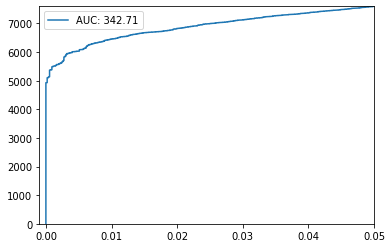

In [8]:
pseudoROC(p)#, onlyFirstRank = False)

In [3]:
len(p.loc[p['q-val'] <= 0.01])

6867